# Run the whole deltas algorithm

In [1]:
%load_ext autoreload
%autoreload 2

import numpy as np
import deltas.pipeline.run as run
import deltas.model_deltas as model_deltas

## Get data

In [2]:
N1 = 10000
N2 = 10
data_clf = run.get_non_sep_data(
    N1=N1,
    N2=N2,
    scale=True)

## Get Classifier

clf


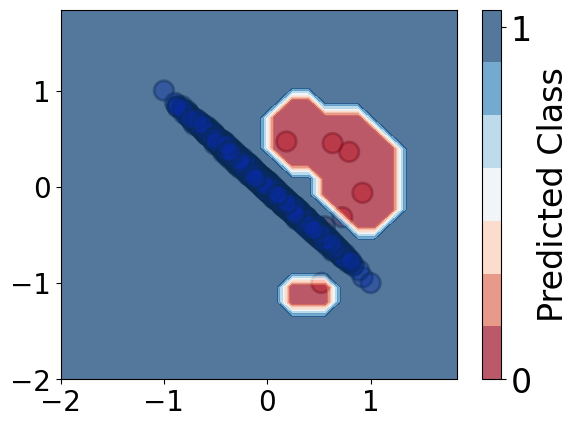

SMOTE


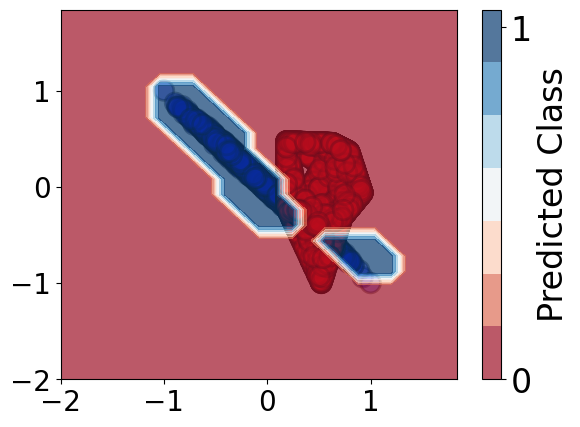

In [3]:
model = 'SVM-linear'
model = 'SVM-rbf'
# model = 'Linear'
# model = 'MLP'

balance_clf = True
balance_clf = False

data_clf['clf'], clf_SMOTE = run.get_classifier(
                      data_clf=data_clf,
                      model=model,
                      balance_clf=balance_clf)

## Fit deltas

deltas init: [1, 0.07074479238344472]
eq. 7 can be satisfied: False
constraint init: False
Solution not possible so ignoring contraint and using decoupled loss function for each delta
Contraint not possible so used uncoupled delta grid Search Optimisation
    delta1 : 0.0001 
    delta2: 0.0001
    constraint satisfied: False


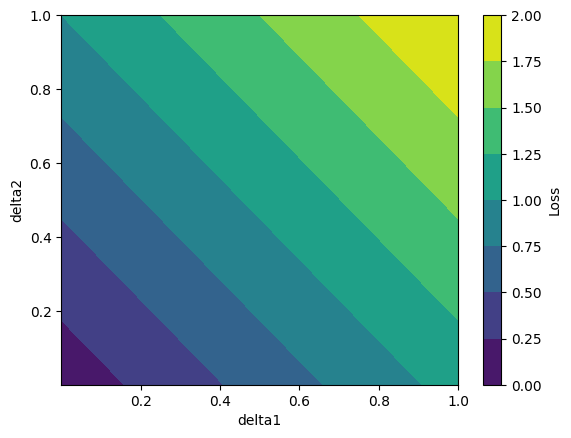

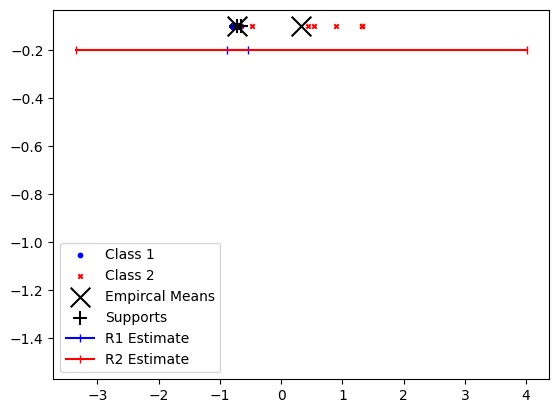

In [4]:
X = data_clf['data']['X']
y = data_clf['data']['y']
clf = data_clf['clf']
# deltas_model = model_deltas.reprojection_deltas(
deltas_model = model_deltas.base_deltas(
    clf,
    ).fit(X, y, _print=True, _plot=True)

## Plot training data information

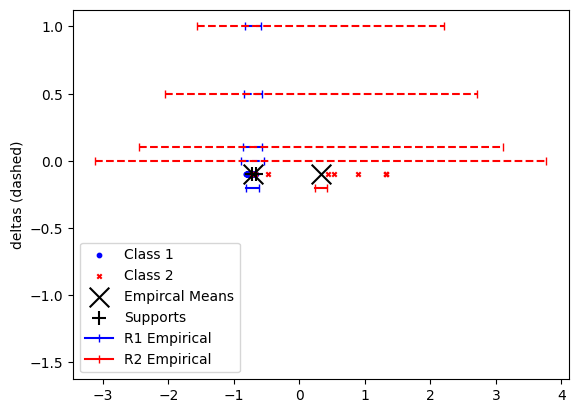

In [5]:
# deltas_model.plot_data(data_clf['mean1'], data_clf['mean2'])
deltas_model.plot_data()

## Show parameters

In [6]:
deltas_model.print_params()

Parameters
                R:  1.3233843306167798
                N1: 10000
                N2: 10
                R1: 0.09519335877977408
                R2: 1.0477566905403066
                M:  0.06000796054703117
                D:  1.0432017856148927
                C1: 1
                C2: 1


# Evaluation on test data

original accuracy: 0.74265
SMOTE accuracy: 0.89725
deltas accuracy: 0.5

original F1: 0.6534706793240422
SMOTE F1: 0.8950513252642868
deltas F1: 0.6666666666666666

original precision0: 0.6601967386281111
SMOTE precision0: 0.881274594490834
deltas precision0: 0.0

original precision1: 1.0
SMOTE precision1: 0.9146226907420937
deltas precision1: 0.5



/home/matt/anaconda3/envs/deltas/lib/python3.10/site-packages/sklearn/metrics/_classification.py:1471: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


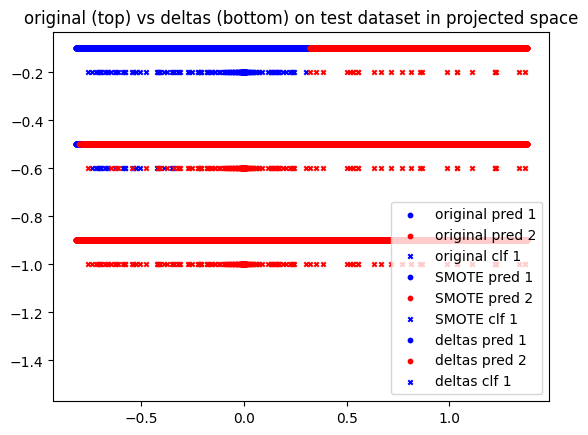

original


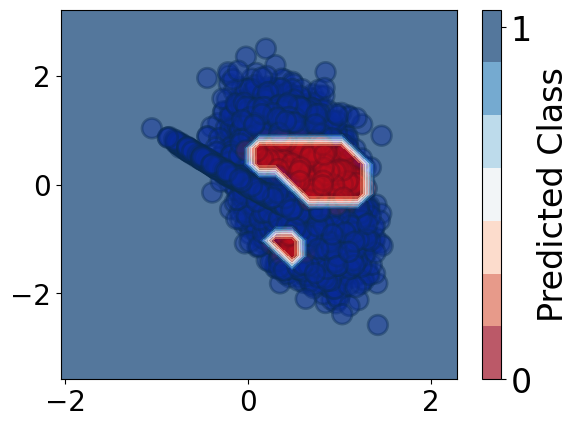

SMOTE


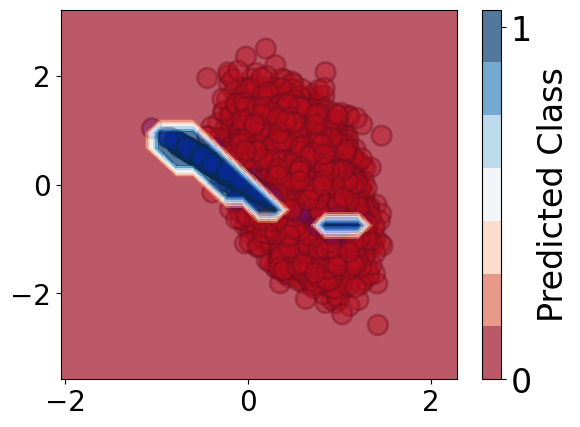

deltas


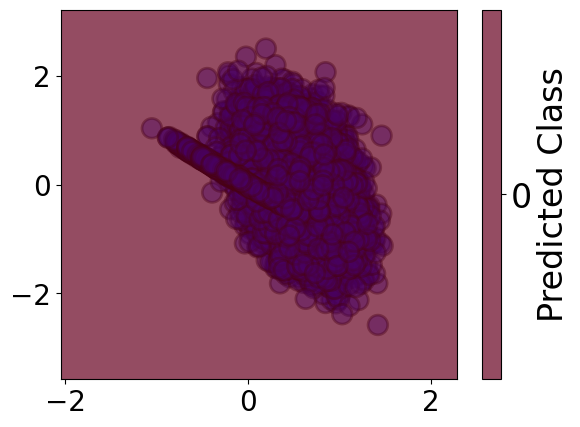

In [7]:
mdels = {'original': clf,
         'SMOTE': clf_SMOTE,
         'deltas': deltas_model}
run.eval_test(mdels,
                       data_clf['data_test'], _print=True, _plot=True)